### Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Content
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

### Reading Data

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('UCI_Credit_Card.csv')
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

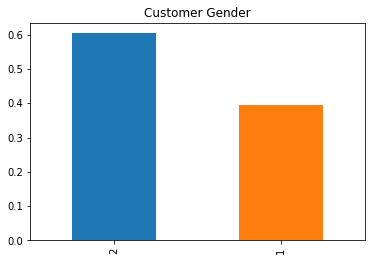

In [96]:
# Gender Profile
data['SEX'].value_counts(normalize=True).plot.bar(title='Customer Gender')

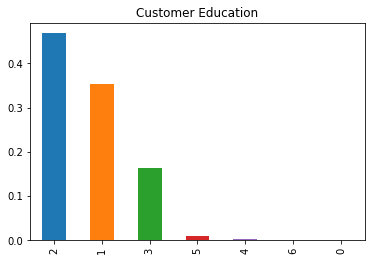

In [97]:
# Educational Prifle
data['EDUCATION'].value_counts(normalize=True).plot.bar(title='Customer Education')

EDUCATION has cathegory `5` and `6` that are unlabeled, moreover it has a label `0` that is undocumented.

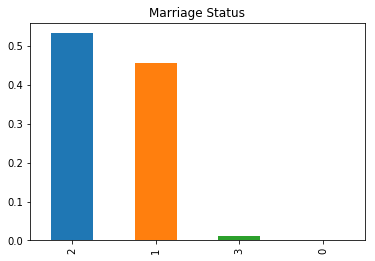

In [98]:
data['MARRIAGE'].value_counts(normalize=True).plot.bar(title='Marriage Status')

In [99]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Undocumented label `0`

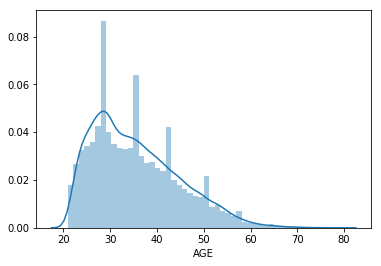

In [100]:
sns.distplot(data['AGE'])

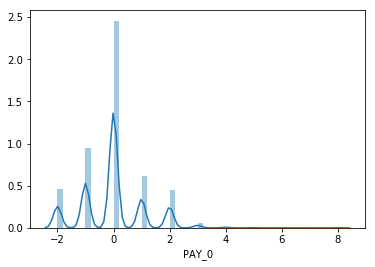

In [101]:
sns.distplot(data['PAY_0'])

In [102]:
data['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

undocumented label `-2`. 

In [103]:
#payment delay description
data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


They all present an undocumented label `-2`.

In [104]:
# Bill Statement description description
data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Negative values can be interpreted as credit?

In [105]:
#Previous Payment Description description description
data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


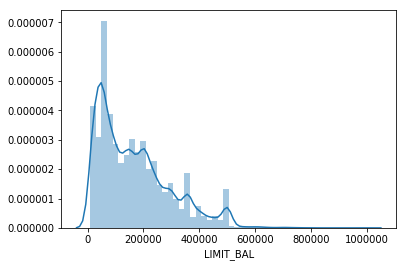

In [106]:
sns.distplot(data['LIMIT_BAL'])

In [107]:
#renaming poorly labeled columns
data = data.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [108]:
#percentage of customers who default on payments
data.def_pay.sum() / len(data.def_pay)

0.22120000000000001

### Data Cleansing

In [109]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [110]:
# 0 in undocumented. We therefore assgin 0 => 3 (ie; other)
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [111]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [112]:
#The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)
fil = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0)
data.loc[fil, 'EDUCATION'] = 4
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

### Analysis

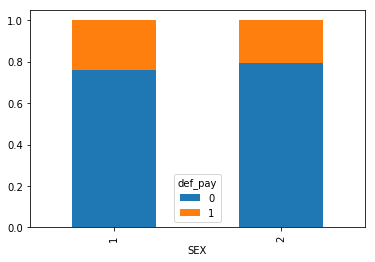

In [113]:
#gender vs def_pay
default_by_gender = pd.crosstab(data.SEX,data.def_pay)
default_by_gender.div(default_by_gender.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)

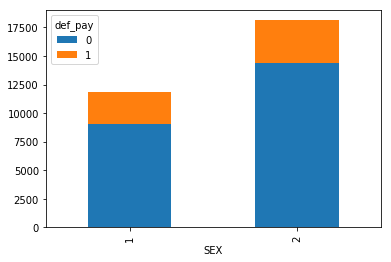

In [114]:
default_by_gender.plot(kind="bar", stacked=True)

In [115]:
gender = data.groupby(['SEX', 'def_pay']).size().unstack(1)
gender['perc'] = (gender[1]/(gender[0] + gender[1])) 
gender

def_pay,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


higher number of females applying for loans.
Males are more likely to default on payments

def_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


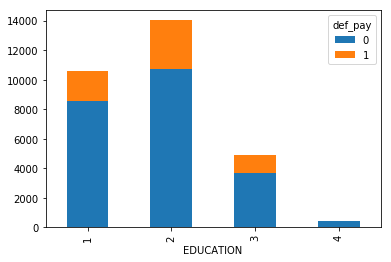

In [116]:
ed = data.groupby(['EDUCATION', 'def_pay']).size().unstack()
ed.plot(kind = 'bar', stacked = True)
ed['perc'] = (ed[1]/(ed[0] + ed[1]))
ed

def_pay,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


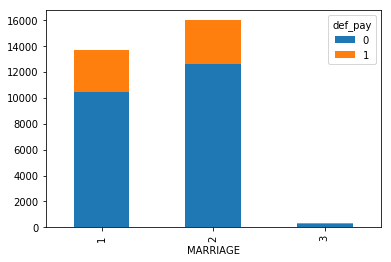

In [117]:
mar = data.groupby(['MARRIAGE', 'def_pay']).size().unstack()
mar.plot(kind = 'bar', stacked = True)
mar['perc'] = (mar[1]/(mar[0] + mar[1]))
mar

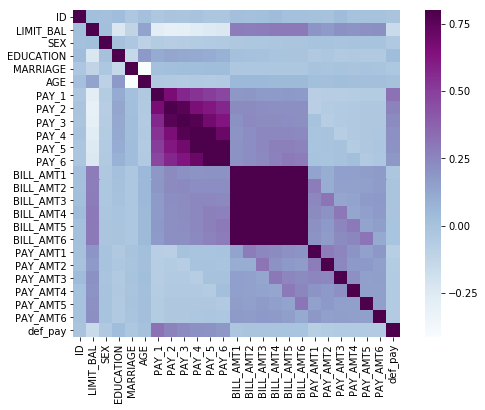

In [118]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu");

In [119]:
from sklearn.utils import shuffle

non_default = data[data['def_pay']==0]
default = data[data['def_pay']==1]
non_default.shape,default.shape
X_train = pd.concat([default.sample(frac = 0.8), non_default.sample(frac = 0.8)], axis = 0)

# X_test contains all the observations not in X_train.
X_test = data.loc[~data.index.isin(X_train.index)]

#Shuffle the dataframes so that the training is done in a random order.
X_train = shuffle(X_train)
X_test = shuffle(X_test)

#Add our target classes to y_train and y_test.
y_train = X_train.def_pay
y_test = X_test.def_pay

#Drop target classes from X_train and X_test.
X_train = X_train.drop(['def_pay'], axis = 1)
X_test = X_test.drop(['def_pay'], axis = 1)

#print(len(X_train))
#print(len(y_train))
#print(len(X_test))
#print(len(y_test))


### LogisticRegression

In [120]:
from sklearn.model_selection import train_test_split
#x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
pred_cv = model.predict(X_test)
print("Accuracy Rate: {:.2f}".format(accuracy_score(y_test,pred_cv)))

Accuracy Rate: 0.78


### DecisionTree

In [126]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
score = accuracy_score(y_test,pred_test)
print("Accuracy Rate: {:.2f}".format(score))

Accuracy Rate: 0.72


### Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, max_depth=10)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
score = accuracy_score(y_test,pred_test)
print("Accuracy Rate: {:.2f}".format(score))

Accuracy Rate: 0.82


### Optimisation

In [129]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
# Fit the grid search model
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [130]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

So, the optimized value for the max_depth variable is 5 and for n_estimator is 21. Now let’s build the model using these optimized values.

In [131]:
model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=21)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
score = accuracy_score(y_test,pred_test)
print("Accuracy Rate: {:.2f}".format(score))

Accuracy Rate: 0.82


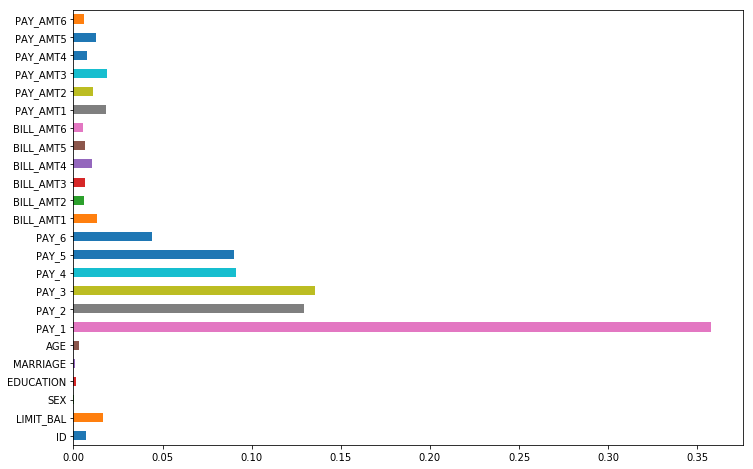

In [135]:
importances=pd.Series(model.feature_importances_, index=X_test.columns)
importances.plot(kind='barh', figsize=(12,8))